# Smoking Prevalence and Ciggrate Price

Smoking is a leading cause of preventable diseases and deaths worldwide. Understanding the factors influencing smoking prevalence is critical for public health policies aimed at reducing smoking rates and associated health risks.

This project aims to explore the relationship between cigarette prices and smoking prevalence across various countries. By analyzing this relationship, we aim to assess the potential impact of price-based interventions, such as taxation, on smoking behaviors.

The dataset includes data from various countries focusing on smoking prevalence, tobacco use, and cigarette pricing.

In [2]:
# Importing the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest
import statsmodels.api as sm
import re

In [3]:
# Checking out the dataset
# Load the dataset
data_2018 = pd.read_csv('Dataset/SmokingAndTobaccoData2018.csv')

# Display the first few rows
data_2018.head()

,Location,CigaretteSmokingPrevalence,TobaccoSmokingPrevalence,TobaccoUsePrevalance,HealyWarningsOnSmoking,CheapestBrandCigaretteCurrency,MostSoldBrandCigaretteCurrency,MostSoldBrandCigarettePrice,PremiumBrandCigarettePrice,TreatmentInHealthFacilities,BanOnEducationalFacilites,BanOnGovernmentFacilites,BanOnHealthcareFacilites,BanOnIndoorOffices,BanOnPublicTransport,BanOnPubsAndBars,BanOnRestaurants,BanOnUniversities,RegulationsOnSmokeFreeEnvironments
0,Albania,43.3 [31.2 – 59.2],50.5 [34.8 – 67.2],50.5 [34.8 – 67.2],No,200,All,240,320,Yes in some,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,11.1 [5.9 – 16.4],14.5 [10.3 – 19.5],18.8 [11.3 – 27.2],No,45,DZD,300,300,Yes in some,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Andorra,27.7 [14.6 – 40.8],33.8 [22 – 47.2],33.8 [22 – 47.2],Not applicable,2.8,EUR,3.6,3.6,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,19.2 [13.9 – 24.3],21.1 [15.4 – 27.5],21.8 [15.3 – 29.1],Yes,28.57,ARS,60,63,Yes in most,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Armenia,25 [19.6 – 30.3],26.7 [21.8 – 31.7],26.7 [21.8 – 31.7],Not applicable,300,AMD,680,700,Yes in some,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning
This section involves cleaning and preparing the datasets.
1. Handle missing values.
2. Extract numerical values from columns.
3. Standardize variable names across datasets.


In [4]:
import re
# Function to extract average
def extract_average(val):
    if isinstance(val, str):
        match = re.search(r'(\d+\.\d+|\d+)', val)
        if match:
            return float(match.group(1))
    return None
# Function to clean a dataset and extract numerical values from ranges

def clean_dataset(filepath, year):
    data = pd.read_csv(filepath)
    data['Year'] = year 
    
    # Extracting numerical data for relevant columns
    data['CigaretteSmokingPrevalence_Cleaned'] = data['CigaretteSmokingPrevalence'].apply(extract_average)
    data['TobaccoSmokingPrevalence_Cleaned'] = data['TobaccoSmokingPrevalence'].apply(extract_average)
    data['TobaccoUsePrevalence_Cleaned'] = data['TobaccoUsePrevalance'].apply(extract_average)
    
    # Ensuring numeric conversion for existing pricing columns
    if 'MostSoldBrandCigarettePrice' in data.columns:
        data['MostSoldBrandCigarettePrice'] = pd.to_numeric(data['MostSoldBrandCigarettePrice'], errors='coerce')
    else:
        data['MostSoldBrandCigarettePrice'] = None  # Add a placeholder if column is missing
    
    if 'PremiumBrandCigarettePrice' in data.columns:
        data['PremiumBrandCigarettePrice'] = pd.to_numeric(data['PremiumBrandCigarettePrice'], errors='coerce')
    else:
        data['PremiumBrandCigarettePrice'] = None  # Add a placeholder if column is missing
    
    return data

# Loading datasets for all available years
data_2008 = clean_dataset('Dataset/SmokingAndTobaccoData2008.csv', 2008)
data_2010 = clean_dataset('Dataset/SmokingAndTobaccoData2010.csv', 2010)
data_2012 = clean_dataset('Dataset/SmokingAndTobaccoData2012.csv', 2012)
data_2014 = clean_dataset('Dataset/SmokingAndTobaccoData2014.csv', 2014)
data_2016 = clean_dataset('Dataset/SmokingAndTobaccoData2016.csv', 2016)
data_2018 = clean_dataset('Dataset/SmokingAndTobaccoData2018.csv', 2018)

# Combining all datasets into one DataFrame
combined_data = pd.concat([data_2008, data_2010, data_2012, data_2014, data_2016, data_2018], ignore_index=True)

# Displaying combined data overview
print("Combined Dataset Overview:")
print(combined_data.info())

Combined Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Location                            894 non-null    object 
 1   CigaretteSmokingPrevalence          894 non-null    object 
 2   TobaccoSmokingPrevalence            894 non-null    object 
 3   TobaccoUsePrevalance                894 non-null    object 
 4   HealyWarningsOnSmoking              894 non-null    object 
 5   MostSoldBrandCigaretteCurrency      894 non-null    object 
 6   MostSoldBrandCigarettePrice         757 non-null    float64
 7   TreatmentInHealthFacilities         894 non-null    object 
 8   BanOnEducationalFacilites           596 non-null    object 
 9   BanOnGovernmentFacilites            596 non-null    object 
 10  BanOnHealthcareFacilites            596 non-null    object 
 11  BanOnIndoorOffices

C:\Users\hello\AppData\Local\Temp\ipykernel_6580\2611289792.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_data = pd.concat([data_2008, data_2010, data_2012, data_2014, data_2016, data_2018], ignore_index=True)


In [5]:
combined_data.shape

(894, 23)

In [6]:
# Handling the null values
filtered_data = combined_data.dropna(subset=['PremiumBrandCigarettePrice'])
print(filtered_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 745 to 893
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Location                            102 non-null    object 
 1   CigaretteSmokingPrevalence          102 non-null    object 
 2   TobaccoSmokingPrevalence            102 non-null    object 
 3   TobaccoUsePrevalance                102 non-null    object 
 4   HealyWarningsOnSmoking              102 non-null    object 
 5   MostSoldBrandCigaretteCurrency      102 non-null    object 
 6   MostSoldBrandCigarettePrice         102 non-null    float64
 7   TreatmentInHealthFacilities         102 non-null    object 
 8   BanOnEducationalFacilites           0 non-null      object 
 9   BanOnGovernmentFacilites            0 non-null      object 
 10  BanOnHealthcareFacilites            0 non-null      object 
 11  BanOnIndoorOffices                  0 non-null  

In [7]:
filtered_data.shape

(102, 23)

In [8]:
# Checking out the filtered dataset
filtered_data

,Location,CigaretteSmokingPrevalence,TobaccoSmokingPrevalence,TobaccoUsePrevalance,HealyWarningsOnSmoking,MostSoldBrandCigaretteCurrency,MostSoldBrandCigarettePrice,TreatmentInHealthFacilities,BanOnEducationalFacilites,BanOnGovernmentFacilites,...,BanOnPubsAndBars,BanOnRestaurants,BanOnUniversities,RegulationsOnSmokeFreeEnvironments,Year,CigaretteSmokingPrevalence_Cleaned,TobaccoSmokingPrevalence_Cleaned,TobaccoUsePrevalence_Cleaned,PremiumBrandCigarettePrice,CheapestBrandCigaretteCurrency
745,Albania,43.3 [31.2 – 59.2],50.5 [34.8 – 67.2],50.5 [34.8 – 67.2],No,All,240.00,Yes in some,NaN,NaN,...,NaN,NaN,NaN,NaN,2018,43.3,50.5,50.5,320.0,200
746,Algeria,11.1 [5.9 – 16.4],14.5 [10.3 – 19.5],18.8 [11.3 – 27.2],No,DZD,300.00,Yes in some,NaN,NaN,...,NaN,NaN,NaN,NaN,2018,11.1,14.5,18.8,300.0,45
747,Andorra,27.7 [14.6 – 40.8],33.8 [22 – 47.2],33.8 [22 – 47.2],Not applicable,EUR,3.60,No,NaN,NaN,...,NaN,NaN,NaN,NaN,2018,27.7,33.8,33.8,3.6,2.8
748,Argentina,19.2 [13.9 – 24.3],21.1 [15.4 – 27.5],21.8 [15.3 – 29.1],Yes,ARS,60.00,Yes in most,NaN,NaN,...,NaN,NaN,NaN,NaN,2018,19.2,21.1,21.8,63.0,28.57
749,Armenia,25 [19.6 – 30.3],26.7 [21.8 – 31.7],26.7 [21.8 – 31.7],Not applicable,AMD,680.00,Yes in some,NaN,NaN,...,NaN,NaN,NaN,NaN,2018,25.0,26.7,26.7,700.0,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,Uruguay,19.5 [15 – 24.3],21.8 [17.3 – 27.4],21.8 [17.3 – 27.4],Yes,UYU,140.00,Yes in most,NaN,NaN,...,NaN,NaN,NaN,NaN,2018,19.5,21.8,21.8,140.0,130
890,Vanuatu,2.4 [1.1 – 3.8],20.1 [12.1 – 28.9],3.3 [1.7 – 4.9],Not applicable,VUV,735.00,No,NaN,NaN,...,NaN,NaN,NaN,NaN,2018,2.4,20.1,3.3,740.0,610
891,Yemen,20.7 [8.1 – 35.2],26.9 [14 – 44.3],32.5 [17.1 – 53.7],Yes,YER,550.00,No,NaN,NaN,...,NaN,NaN,NaN,NaN,2018,20.7,26.9,32.5,700.0,200
892,Zambia,11.5 [8.7 – 14.3],24.1 [19.1 – 29.8],25 [19.8 – 30.9],No,ZMW,17.50,Yes in some,NaN,NaN,...,NaN,NaN,NaN,NaN,2018,11.5,24.1,25.0,35.0,4


### Hypothesis and Research Question

This study investigates whether higher cigarette prices lead to reduced smoking prevalence globally.

**Null Hypothesis (H₀):** No significant relationship exists between cigarette prices and smoking prevalence.  
**Alternative Hypothesis (H₁):** Higher cigarette prices are associated with lower smoking prevalence.

Economic theory suggests price increases reduce demand. However, smoking habits often involve addictive behavior, potentially weakening this relationship.


## Exploratory Data Analysis (EDA)
Performing EDA to understand the data distribution, detect outliers, and identify trends in smoking prevalence and cigarette prices.


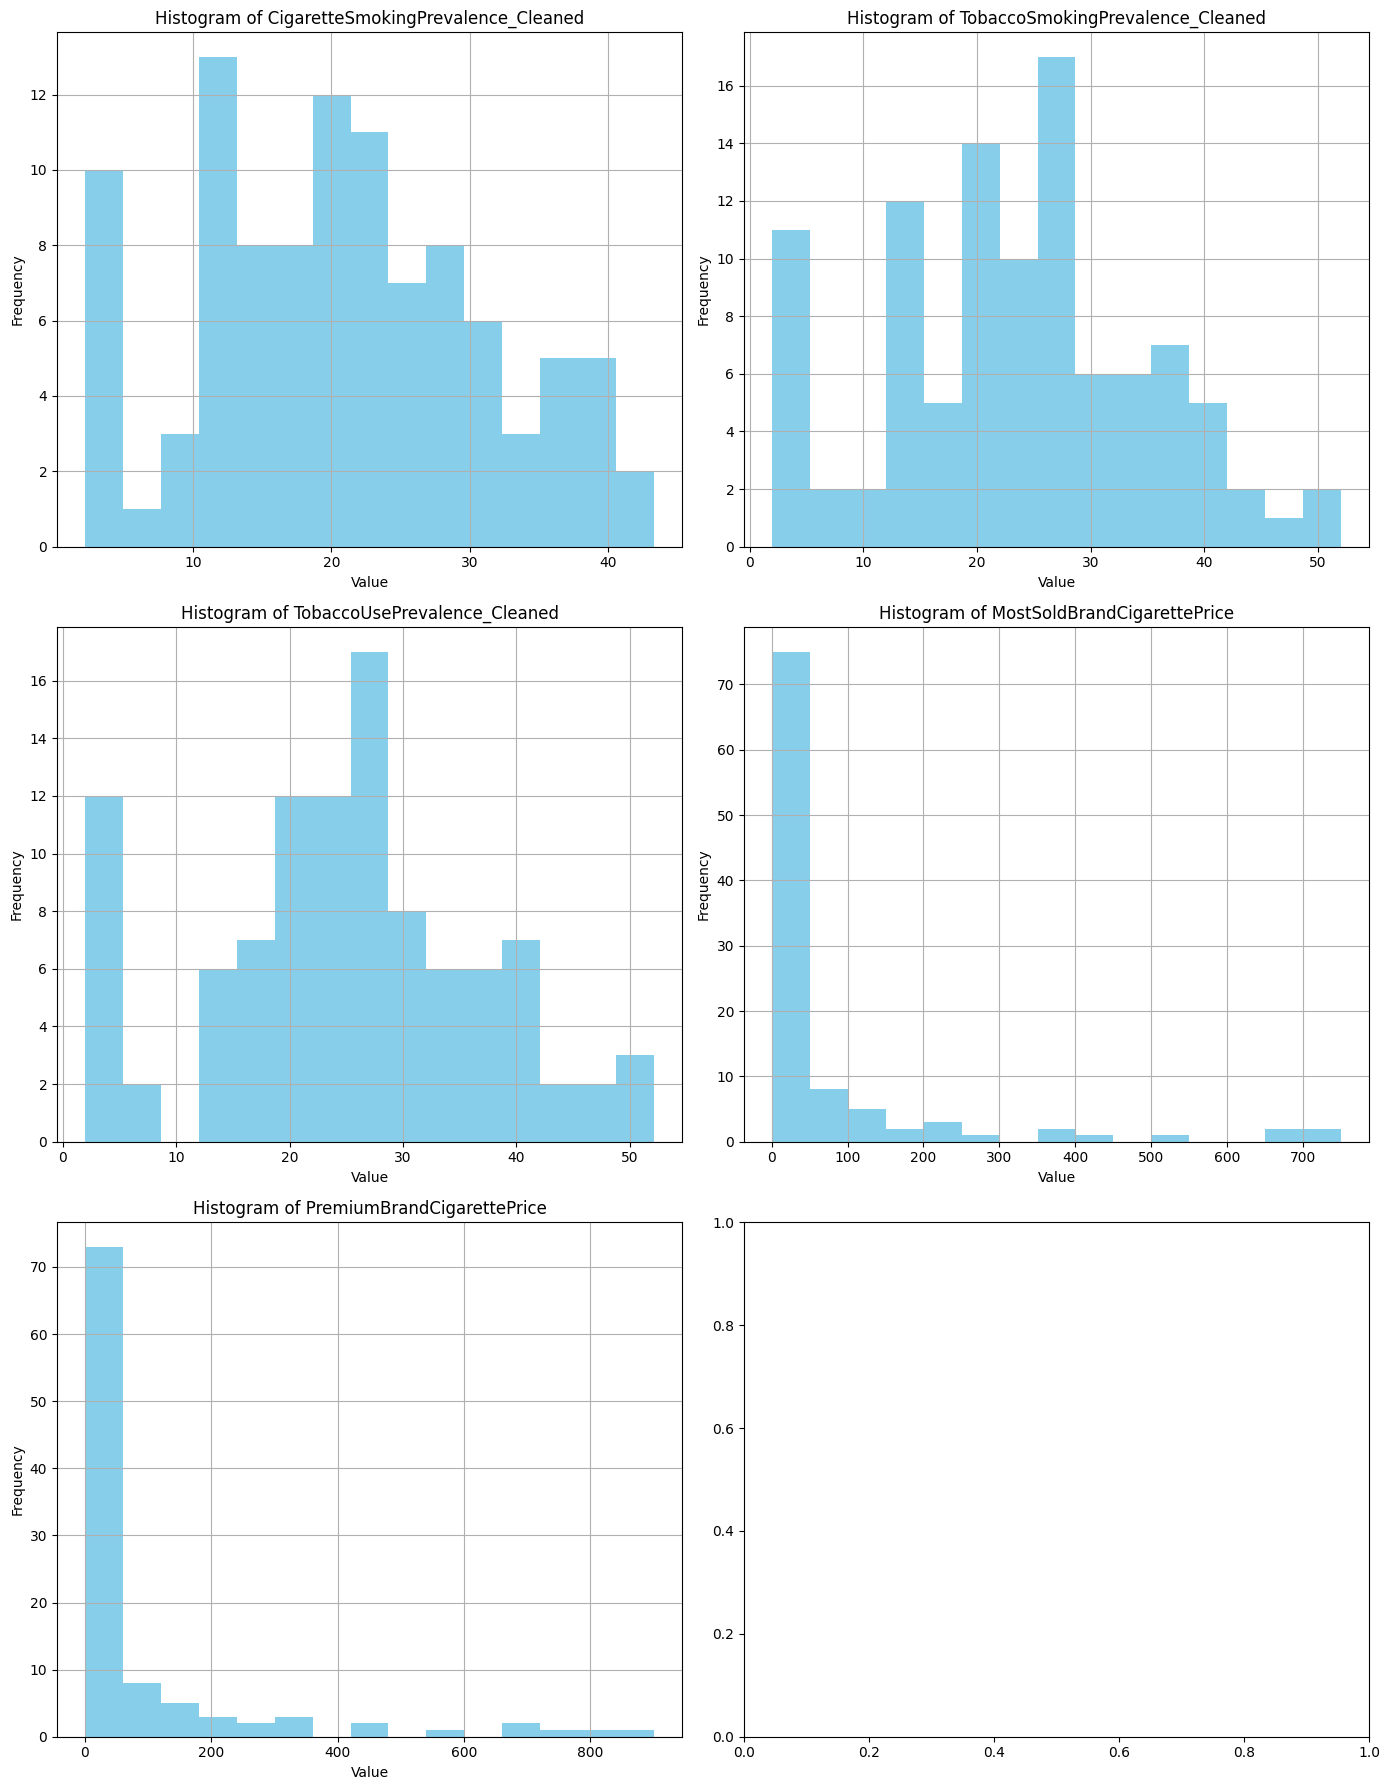

Descriptive Statistics for Quantitative Variables:

       CigaretteSmokingPrevalence_Cleaned  TobaccoSmokingPrevalence_Cleaned  \
count                          102.000000                        102.000000   
mean                            20.790196                         23.558824   
std                             10.240470                         11.541662   
min                              2.200000                          2.000000   
25%                             12.600000                         15.200000   
50%                             20.800000                         23.850000   
75%                             27.150000                         29.975000   
max                             43.300000                         52.000000   

       TobaccoUsePrevalence_Cleaned  MostSoldBrandCigarettePrice  \
count                    102.000000                   102.000000   
mean                      24.913725                    80.645294   
std                       12.195

In [9]:
# Quantitative variables for analysis
quantitative_vars = [
    'CigaretteSmokingPrevalence_Cleaned',
    'TobaccoSmokingPrevalence_Cleaned',
    'TobaccoUsePrevalence_Cleaned',
    'MostSoldBrandCigarettePrice',
    'PremiumBrandCigarettePrice'
]

# Descriptive statistics for each variable
descriptive_stats = filtered_data[quantitative_vars].describe()

# Plotting histograms for all quantitative variables
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

for i, var in enumerate(quantitative_vars):
    filtered_data[var].dropna().hist(ax=axes[i // 2, i % 2], bins=15, color='skyblue')
    axes[i // 2, i % 2].set_title(f'Histogram of {var}')
    axes[i // 2, i % 2].set_xlabel('Value')
    axes[i // 2, i % 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Displaying descriptive statistics
print("Descriptive Statistics for Quantitative Variables:\n")
print(descriptive_stats)


In [10]:
# Function to detect outliers using IQR
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Checking for outliers in each quantitative variable
for var in quantitative_vars:
    outliers = detect_outliers(filtered_data, var)
    print(f"Outliers in {var}:\n", outliers[['Location', var]])

Outliers in CigaretteSmokingPrevalence_Cleaned:
 Empty DataFrame
Columns: [Location, CigaretteSmokingPrevalence_Cleaned]
Index: []
Outliers in TobaccoSmokingPrevalence_Cleaned:
 Empty DataFrame
Columns: [Location, TobaccoSmokingPrevalence_Cleaned]
Index: []
Outliers in TobaccoUsePrevalence_Cleaned:
 Empty DataFrame
Columns: [Location, TobaccoUsePrevalence_Cleaned]
Index: []
Outliers in MostSoldBrandCigarettePrice:
                                   Location  MostSoldBrandCigarettePrice
745                                Albania                        240.0
746                                Algeria                        300.0
749                                Armenia                        680.0
765                           Burkina Faso                        750.0
783  Democratic People's Republic of Korea                        229.0
785                     Dominican Republic                        200.0
800                                 Guyana                        380.0
804  

## Probability Mass Function (PMF)
Analyzing the PMF of smoking prevalence under different scenarios (e.g., high vs. low prevalence countries).

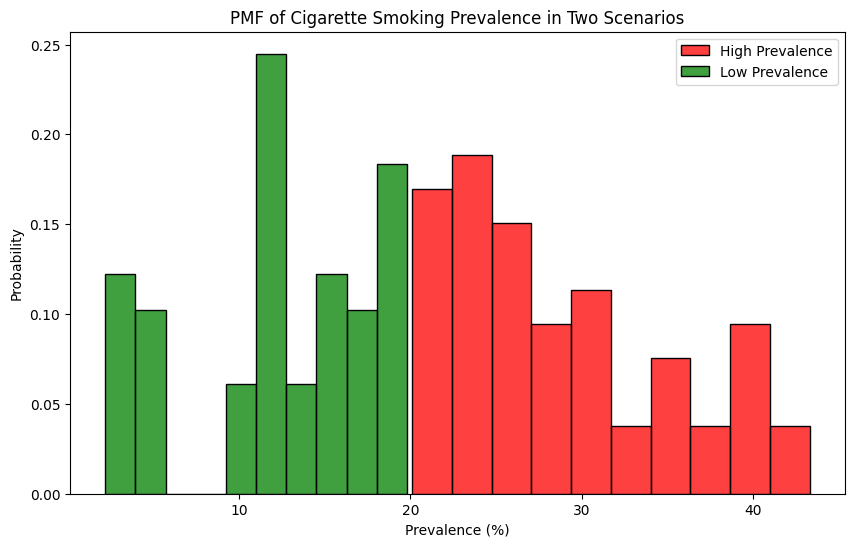

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering the dataset for two scenarios
high_prevalence = filtered_data[filtered_data['CigaretteSmokingPrevalence_Cleaned'] > 20]
low_prevalence = filtered_data[filtered_data['CigaretteSmokingPrevalence_Cleaned'] <= 20]

# Calculating PMF
fig, ax = plt.subplots(figsize=(10, 6))

# PMF for high prevalence
sns.histplot(high_prevalence['CigaretteSmokingPrevalence_Cleaned'], 
             kde=False, label='High Prevalence', stat='probability', color='red', bins=10)

# PMF for low prevalence
sns.histplot(low_prevalence['CigaretteSmokingPrevalence_Cleaned'], 
             kde=False, label='Low Prevalence', stat='probability', color='green', bins=10)

# Customizing the diagram
ax.set_title('PMF of Cigarette Smoking Prevalence in Two Scenarios')
ax.set_xlabel('Prevalence (%)')
ax.set_ylabel('Probability')
plt.legend()
plt.show()

## Cumulative Distribution Function (CDF)
The CDF helps visualize the cumulative probability of smoking prevalence across countries.

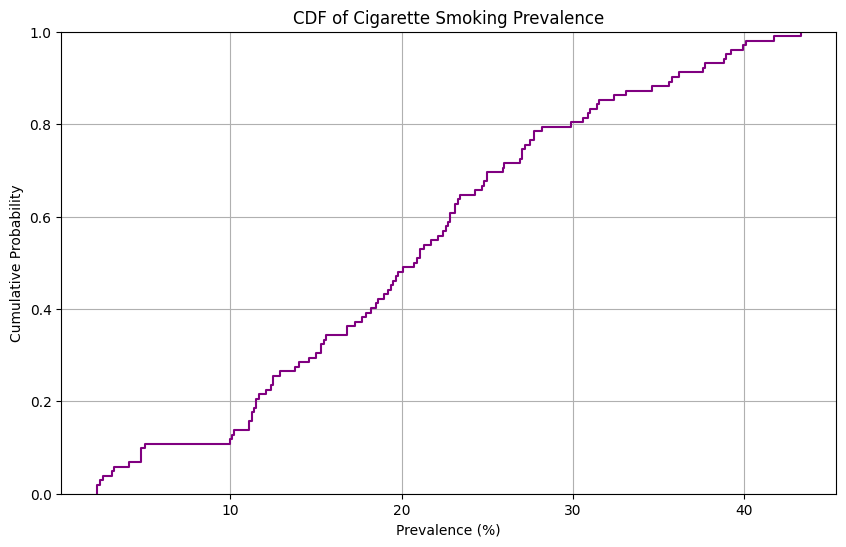

In [12]:
# Ploting CDF for Cigarette Smoking Prevalence
fig, ax = plt.subplots(figsize=(10, 6))

# Using seaborn to plot CDF
sns.ecdfplot(filtered_data['CigaretteSmokingPrevalence_Cleaned'], ax=ax, color='purple')

# Customizing the diagram
ax.set_title('CDF of Cigarette Smoking Prevalence')
ax.set_xlabel('Prevalence (%)')
ax.set_ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

## Analytical Distribution Fitting
Fitting a normal distribution to the smoking prevalence data and evaluate the goodness of fit.


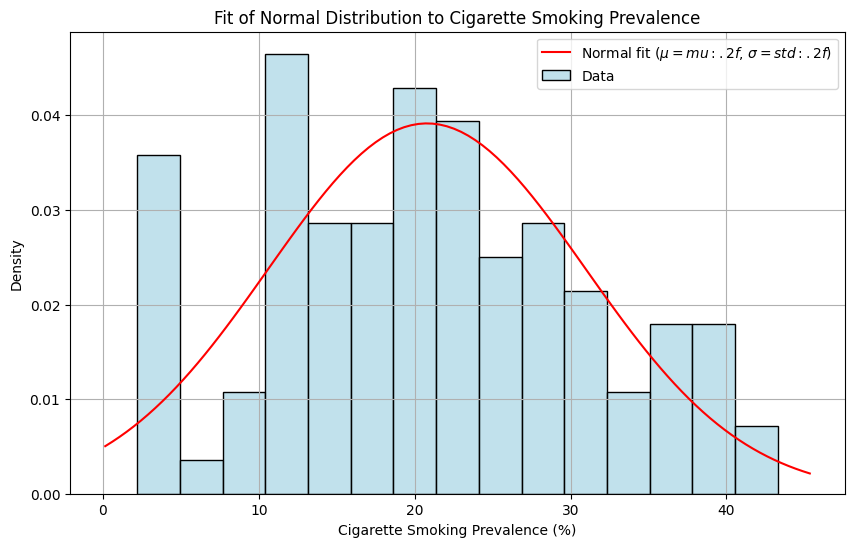

Kolmogorov-Smirnov Test Statistic: 0.0472
P-value: 0.9688


In [13]:
from scipy.stats import norm, kstest
import numpy as np

# Extracting the variable
smoking_prevalence = filtered_data['CigaretteSmokingPrevalence_Cleaned'].dropna()

# Fitting a normal distribution
mu, std = norm.fit(smoking_prevalence)

# Plotting the histogram of the data
plt.figure(figsize=(10, 6))
sns.histplot(smoking_prevalence, bins=15, kde=False, stat="density", color='lightblue', label='Data')

# Plotting the PDF (Probability Density Function) of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', label=r'Normal fit ($\mu={mu:.2f}$, $\sigma={std:.2f}$)')
# Customize the plot
plt.title('Fit of Normal Distribution to Cigarette Smoking Prevalence')
plt.xlabel('Cigarette Smoking Prevalence (%)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Performing the Kolmogorov-Smirnov test to evaluate goodness of fit
ks_stat, p_value = kstest(smoking_prevalence, 'norm', args=(mu, std))
print(f"Kolmogorov-Smirnov Test Statistic: {ks_stat:.4f}")
print(f"P-value: {p_value:.4f}")

## Hypothesis Testing Using Regression
Using linear regression to evaluate the relationship between cigarette prices and smoking prevalence.


                                    OLS Regression Results                                    
Dep. Variable:     CigaretteSmokingPrevalence_Cleaned   R-squared:                       0.024
Model:                                            OLS   Adj. R-squared:                  0.014
Method:                                 Least Squares   F-statistic:                     2.452
Date:                                Thu, 14 Nov 2024   Prob (F-statistic):              0.121
Time:                                        18:52:02   Log-Likelihood:                -380.28
No. Observations:                                 102   AIC:                             764.6
Df Residuals:                                     100   BIC:                             769.8
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                                  coef    std err 

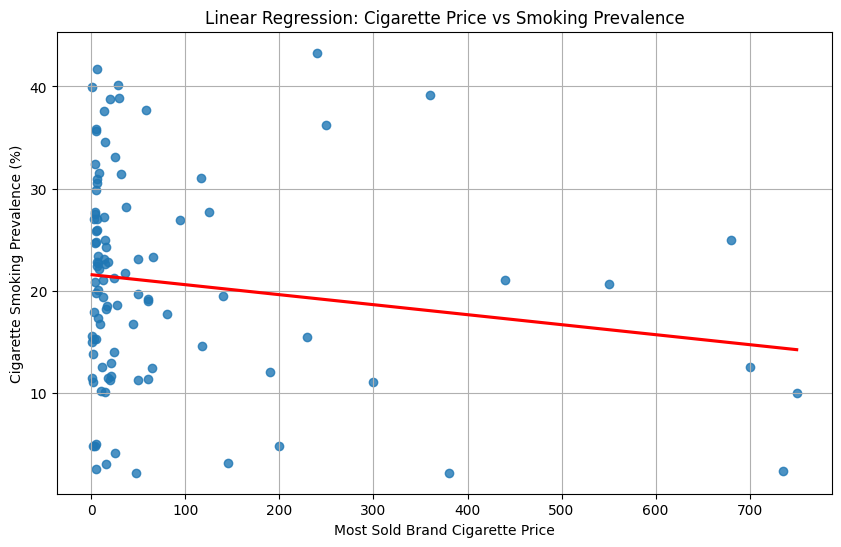

In [14]:
# Defining the dependent (Y) and independent (X) variables
X = filtered_data['MostSoldBrandCigarettePrice']
Y = filtered_data['CigaretteSmokingPrevalence_Cleaned']

# Adding a constant to the independent variable for the intercept term
X = sm.add_constant(X)

# Fitting the linear regression model
model = sm.OLS(Y, X).fit()

# Printing the regression summary
print(model.summary())

# Ploting the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='MostSoldBrandCigarettePrice', y='CigaretteSmokingPrevalence_Cleaned', data=filtered_data, ci=None, line_kws={'color':'red'})
plt.title('Linear Regression: Cigarette Price vs Smoking Prevalence')
plt.xlabel('Most Sold Brand Cigarette Price')
plt.ylabel('Cigarette Smoking Prevalence (%)')
plt.grid(True)
plt.show()

## Multivariate Regression Analysis
We extend the regression analysis by including multiple predictors to evaluate their combined effect on smoking prevalence.

                                    OLS Regression Results                                    
Dep. Variable:     CigaretteSmokingPrevalence_Cleaned   R-squared:                       0.032
Model:                                            OLS   Adj. R-squared:                  0.012
Method:                                 Least Squares   F-statistic:                     1.612
Date:                                Thu, 14 Nov 2024   Prob (F-statistic):              0.205
Time:                                        18:52:06   Log-Likelihood:                -379.88
No. Observations:                                 102   AIC:                             765.8
Df Residuals:                                      99   BIC:                             773.6
Df Model:                                           2                                         
Covariance Type:                            nonrobust                                         
                                  coef    std err 

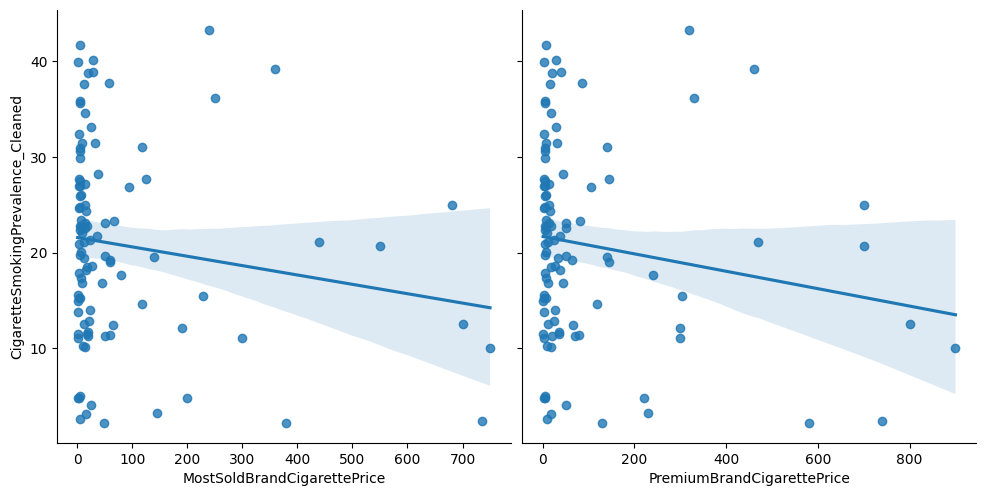

In [15]:
# Defining the dependent variable (Y) and independent variables (X)
X_multi = filtered_data[['MostSoldBrandCigarettePrice', 'PremiumBrandCigarettePrice']]
Y = filtered_data['CigaretteSmokingPrevalence_Cleaned']

# Adding a constant to the independent variables for the intercept term
X_multi = sm.add_constant(X_multi)

# Fitting the multivariate linear regression model
multi_model = sm.OLS(Y, X_multi).fit()

# Printing the regression summary
print(multi_model.summary())

# Pairploting to visualize relationships
sns.pairplot(filtered_data, x_vars=['MostSoldBrandCigarettePrice', 'PremiumBrandCigarettePrice'], 
             y_vars='CigaretteSmokingPrevalence_Cleaned', kind='reg', height=5)
plt.show()

### Results Interpretation

**Regression Analysis:**
- **Simple Regression:** The coefficient for "MostSoldBrandCigarettePrice" is negative but not statistically significant (p = 0.121).
- **Multivariate Regression:** Adding "PremiumBrandCigarettePrice" improved the model marginally but remained insignificant (p > 0.05).

**Conclusion:** 
The analysis fails to reject the null hypothesis, indicating price alone may not significantly influence smoking prevalence. Other factors, such as regulations and cultural norms, likely have stronger impacts.
